# **Final Project**, BAIT509 Winter 2023
**Business Applications of Machine Learning [100 Marks]**

**Deadline: Thursday, February 9th @ 11:59pm**

**Academic Integrity**

This is a group project. Do not share your code with other groups, or post any parts of your work online. You can only submit code that is produced by your group. If you use any online resource for developing parts of your code, you must explicitly acknowledge the source in a comment in your code. Students suspected of plagiarism on the project will be referred to the university for formal discipline according to the regulations.

**Please note that late submissions receive a mark of 0 as per course outline and RHL regulations.**

Please fill out the following:

• Full Names of all Group members: 


1.   Felipe Ribeiro
2.   Xuanyi (Eric) Zhu
3.   Yashika Kochhar


• Student Numbers of all Group member: 


1.   43112572 
2.   60366614
3.   43596394


• Group number (from Canvas): Group 10


**Two submission files are required per group:**

For submitting this project, two files must be submitted on Canvas by the project deadline:

1) The complete Jupyter file (in .ipynb format) (that completely compiles on Google colab without any errors independent of the computer used.)

2) A self-contained and complete pdf printout of the same Jupyter file with all the output printed as well as all the code, text cells, comments, and figures.

**Policy regarding the use of AI assistant tools**

If you use ChatGPT (or a similar tool) to get ideas and/or partial answers for this project or to generate any text, you must declare that you have used it, with a couple sentences describing the extent to which it was used, and you must save any generated text from this tool in case it is requested.

You will not be penalized for using such AI assistant tools, but the TA or the instructor may ask you to provide the generated text in order to help with grading decisions. In this case, your (or your group's) original contributions will be evaluated. Failure to fully declare the use of this tool will be considered "unauthorized" (See 3.b of the [Vancouver Academic Calendar](https://www.calendar.ubc.ca/vancouver/index.cfm?tree=3,54,111,1745))

## **Part 0: Loading the libraries and the data [0 Marks]**


In this project, we want to develop a statistical model for the mortality rate of lung cancer in the United States.

One of the parts overlooked in many machine learning projects is preprocessing. And a good way to learn it is by solving a lot of examples and test cases. A big part of this project is walking you through preprocessing, making informed decisions using your observations, and exploratory data analysis. Then we use supervised learning methods to construct models to predict the mortality rate of lung cancer using the features provided here.

In [1]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# statistical learning
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Loading data
Load the three csv files as pandas dataframes directly from their URLs.

In [2]:
fulldf = pd.read_csv('https://saref.github.io/teaching/BAIT509/mydata.csv').drop(columns='Unnamed: 0')
data_dict = pd.read_csv('https://saref.github.io/teaching/BAIT509/descriptions.csv')
populationdf = pd.read_csv('https://saref.github.io/teaching/BAIT509/populations.csv').drop(columns='Unnamed: 0')

Data set `mydata.csv` includes most of the data. Explanations on the meaning of each of the columns are included in `descriptions.csv`. Please take your time to understand the three dataframes before proceeding.

In [3]:
#Data exploring
fulldf.head(3)

State                            AreaName  All_Poverty  M_Poverty  \
0    AK      Aleutians East Borough, Alaska          553        334   
1    AK  Aleutians West Census Area, Alaska          499        273   
2    AK      Anchorage Municipality, Alaska        23914      10698   

   F_Poverty  FIPS  Med_Income  Med_Income_White  Med_Income_Black  \
0        219  2013     61518.0           72639.0           31250.0   
1        226  2016     84306.0           97321.0           93750.0   
2      13216  2020     78326.0           87235.0           50535.0   

   Med_Income_Nat_Am  ...  M_Without  F_With  F_Without  All_With  \
0            54750.0  ...       1317     566        540      1442   
1            48750.0  ...        769    1707        564      4177   
2            53935.0  ...      23245  122426      21393    243173   

   All_Without  Incidence_Rate  Avg_Ann_Incidence  Recent_Trend  \
0         1857               *         3 or fewer             *   
1         1333               *         3 or fewer             *   
2        44638            61.5                131        stable   

  Mortality_Rate Avg_Ann_Deaths  
0              *              *  
1              *              *  
2           47.3             96  

[3 rows x 23 columns]

In [4]:
#Data exploring 2
data_dict

Unnamed: 0              Feature  \
0            0                State   
1            1             AreaName   
2            2          All_Poverty   
3            3            M_Poverty   
4            4            F_Poverty   
5            5                 FIPS   
6            6           Med_Income   
7            7     Med_Income_White   
8            8     Med_Income_Black   
9            9    Med_Income_Nat_Am   
10          10     Med_Income_Asian   
11          11  Med_Income_Hispanic   
12          12               M_With   
13          13            M_Without   
14          14               F_With   
15          15            F_Without   
16          16             All_With   
17          17          All_Without   
18          18       Incidence_Rate   
19          19    Avg_Ann_Incidence   
20          20         Recent_Trend   
21          21       Mortality_Rate   
22          22       Avg_Ann_Deaths   

                                           Definition  \
0                                                 NaN   
1                                                 NaN   
2   Both male and female reported below poverty li...   
3                           Males below poverty (Raw)   
4                         Females below poverty (Raw)   
5                           State + County FIPS (Raw)   
6                   Med_Income all enthnicities (Raw)   
7                              Med_Income white (Raw)   
8                              Med_Income black (Raw)   
9                    Med_Income native American (Raw)   
10                             Med_Income Asian (Raw)   
11                          Med_Income Hispanic (Raw)   
12                  Males with health insurance (Raw)   
13               Males without health insurance (Raw)   
14                Females with health insurance (Raw)   
15             Females without health insurance (Raw)   
16            Males and Femaes with health ins. (Raw)   
17          Males an Females without health ins (Raw)   
18           Lung cancer incidence rate (per 100,000)   
19           Average lung cancer incidence rate (Raw)   
20                           Recent trend (incidence)   
21           Lung cancer mortality rate (per 100,000)   
22              Average lung cancer mortalities (Raw)   

                                 Notes  
0                                  NaN  
1                                  NaN  
2                                  NaN  
3                                  NaN  
4                                  NaN  
5                                  NaN  
6                                  NaN  
7                                  NaN  
8                                  NaN  
9                                  NaN  
10                                 NaN  
11                                 NaN  
12                                 NaN  
13                                 NaN  
14                                 NaN  
15                                 NaN  
16                                 NaN  
17                                 NaN  
18  '*' = fewer that 16 reported cases  
19                                 NaN  
20                                 NaN  
21  '*' = fewer that 16 reported cases  
22                                 NaN

In [5]:
#Data exploring 3
populationdf

POPESTIMATE2015  STATE  COUNTY
0             4858979      1       0
1               55347      1       1
2              203709      1       3
3               26489      1       5
4               22583      1       7
...               ...    ...     ...
3188            31978     54      51
3189            27037     54      53
3190            61164     54      55
3191            27451     54      57
3192            25292     54      59

[3193 rows x 3 columns]

## **Part 1: Getting started [40 Marks]**

## Data cleaning
In this project, we go through specific data cleaning steps. Please read through the instructions carefully.


### 1.1 Convert `FIPS` column to correct format [5 Marks]
Federal Information Processing Standard or [FIPS](https://en.wikipedia.org/wiki/FIPS_county_code) is a categorical variable. It is a code with five digits. The left two digits showing the state and the three right digits showing the county code. We recognize that desipite being a number, FIPS is actually a categorical variable.
First, check the format of the `FIPS` column and convert them to the five digit format with type `np.object_` as seen in the county level section, [here](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt#:~:text=county%2Dlevel%20%20%20%20%20%20place). 

*Hint*: You can use [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to first convert the type and then use [`str.pad`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.pad.html) to format the values as five digit numbers.

In [6]:
# step 1.1 - Converting FIPS values to the same format as in the dataframe
fulldf['FIPS'] = fulldf['FIPS'].apply(str).str.pad(5, fillchar='0')
fulldf.FIPS

0       02013
1       02016
2       02020
3       02050
4       02060
        ...  
3129    56037
3130    56039
3131    56041
3132    56043
3133    56045
Name: FIPS, Length: 3134, dtype: object

### 1.2 Check for null values [5 Marks]

Just check for null values and remove columns whenever the percentage of null values is greater than 20. Please briefly justify your choices w.r.t. the columns you have removed.

**Answer: We decided to remove columns with the median income for non white populations (Hispanic, Black, Native American and Asian) since especially for the last two, most counties don't have an estimate for income in those minority groups. 
Also, by including the median total income and median income for white populations we are already capture the effect of non-white populations.**

In [7]:
# step 1.2.1 -  Code leveraged from Open AI Playground but double check with alternative method below.
null_values = fulldf.apply(lambda x: x.isnull().mean()*100)
print(null_values)

#Cross-check with other method, unmute to check.
#missing_values_count = fulldf.isnull().sum()/3134*100
#missing_values_count

State                   0.000000
AreaName                0.000000
All_Poverty             0.000000
M_Poverty               0.000000
F_Poverty               0.000000
FIPS                    0.000000
Med_Income              0.031908
Med_Income_White        0.063816
Med_Income_Black       38.608807
Med_Income_Nat_Am      52.967454
Med_Income_Asian       56.062540
Med_Income_Hispanic    21.729419
M_With                  0.000000
M_Without               0.000000
F_With                  0.000000
F_Without               0.000000
All_With                0.000000
All_Without             0.000000
Incidence_Rate          0.000000
Avg_Ann_Incidence       0.000000
Recent_Trend            0.000000
Mortality_Rate          0.000000
Avg_Ann_Deaths          0.000000
dtype: float64


In [8]:
# step 1.2.2 - Keep Columns with less than 20% NULL values.
df12 = fulldf.loc[:, null_values < 20]
df12

State                            AreaName  All_Poverty  M_Poverty  \
0       AK      Aleutians East Borough, Alaska          553        334   
1       AK  Aleutians West Census Area, Alaska          499        273   
2       AK      Anchorage Municipality, Alaska        23914      10698   
3       AK          Bethel Census Area, Alaska         4364       2199   
4       AK         Bristol Bay Borough, Alaska           69         33   
...    ...                                 ...          ...        ...   
3129    WY          Sweetwater County, Wyoming         5058       2177   
3130    WY               Teton County, Wyoming         1638       1026   
3131    WY               Uinta County, Wyoming         2845       1453   
3132    WY            Washakie County, Wyoming         1137        489   
3133    WY              Weston County, Wyoming          958        354   

      F_Poverty   FIPS  Med_Income  Med_Income_White  M_With  M_Without  \
0           219  02013     61518.0           72639.0     876       1317   
1           226  02016     84306.0           97321.0    2470        769   
2         13216  02020     78326.0           87235.0  120747      23245   
3          2165  02050     51012.0           92647.0    6396       2708   
4            36  02060     79750.0           88000.0     419        124   
...         ...    ...         ...               ...     ...        ...   
3129       2881  56037     69022.0           69333.0   19891       3318   
3130        612  56039     75325.0           77651.0    8948       2558   
3131       1392  56041     56569.0           56532.0    9132       1413   
3132        648  56043     47652.0           48110.0    3349        691   
3133        604  56045     57738.0           57842.0    2927        454   

      F_With  F_Without  All_With  All_Without Incidence_Rate  \
0        566        540      1442         1857              *   
1       1707        564      4177         1333              *   
2     122426      21393    243173        44638           61.5   
3       6627       1774     13023         4482           62.7   
4        349         67       768          191              *   
...      ...        ...       ...          ...            ...   
3129   18600       2683     38491         6001           39.9   
3130    9555       1192     18503         3750           23.7   
3131    8711       1503     17843         2916           31.7   
3132    3490        703      6839         1394             50   
3133    3087        314      6014          768           44.9   

     Avg_Ann_Incidence Recent_Trend Mortality_Rate Avg_Ann_Deaths  
0           3 or fewer            *              *              *  
1           3 or fewer            *              *              *  
2                  131       stable           47.3             96  
3                    6       stable           58.3              5  
4           3 or fewer            *              *              *  
...                ...          ...            ...            ...  
3129                14       stable           28.4              9  
3130                 5       stable           29.1              5  
3131                 6       stable           22.1              4  
3132                 6       stable           38.2              5  
3133                 4       stable           43.5              4  

[3134 rows x 19 columns]

1.3 Check the format of columns [5 Marks]
Report the format of each column. List the columns that are in an unexpected format and state why you think that is the case.

*Hint*: You can do this by either inspecting the dataframe or by writing a code snippet that tells you what cells cannot be reformatted to the correct format. The Titatinc Jupyter file that we covered in class may also give you some useful ideas.

**Answer: Columns "Incidence_Rate", "Avg_Ann_Indicence", "Mortality_Rate" and "Avg_Ann_Deaths" are stored as objects (strings) but we would expect them to be numeric (integer or float). Later we will reformat them to float in order to conduct regression and use these columns in the predictions.**

In [9]:
#step 1.3 - Checking data formats for each of the columns. 
column_formats = df12.dtypes
print(column_formats)
#We see Incidence and Mortality are stored as strings.

State                 object
AreaName              object
All_Poverty            int64
M_Poverty              int64
F_Poverty              int64
FIPS                  object
Med_Income           float64
Med_Income_White     float64
M_With                 int64
M_Without              int64
F_With                 int64
F_Without              int64
All_With               int64
All_Without            int64
Incidence_Rate        object
Avg_Ann_Incidence     object
Recent_Trend          object
Mortality_Rate        object
Avg_Ann_Deaths        object
dtype: object


### 1.4 Merge the population data to the main dataframe [5 Marks]
You already know about FIPS. You can use the state and county columns in this dataset to construct a FIPS column in the population dataframe in the same format as the main dataframe. Then merge the population data to the main dataframe. It is up to you to decide the type of merge and whether it is done properly.

In [10]:
# step 1.4.1 - Change STATE and COUNTY into right length and format, then create lookup key.
populationdf['STATE'] = populationdf['STATE'].apply(str).str.pad(2, fillchar='0')
populationdf['COUNTY'] = populationdf['COUNTY'].apply(str).str.pad(3, fillchar='0')
populationdf['FIPS_lookup'] = populationdf.apply(lambda row: row['STATE'] + row['COUNTY'], axis=1)
populationdf

POPESTIMATE2015 STATE COUNTY FIPS_lookup
0             4858979    01    000       01000
1               55347    01    001       01001
2              203709    01    003       01003
3               26489    01    005       01005
4               22583    01    007       01007
...               ...   ...    ...         ...
3188            31978    54    051       54051
3189            27037    54    053       54053
3190            61164    54    055       54055
3191            27451    54    057       54057
3192            25292    54    059       54059

[3193 rows x 4 columns]

In [11]:
#step 1.4.2 - Merge new columns into the dataframe.
df14 = pd.merge(df12,populationdf[['FIPS_lookup','POPESTIMATE2015','STATE']],left_on='FIPS', right_on='FIPS_lookup', how='left')
df14.head()

State                            AreaName  All_Poverty  M_Poverty  \
0    AK      Aleutians East Borough, Alaska          553        334   
1    AK  Aleutians West Census Area, Alaska          499        273   
2    AK      Anchorage Municipality, Alaska        23914      10698   
3    AK          Bethel Census Area, Alaska         4364       2199   
4    AK         Bristol Bay Borough, Alaska           69         33   

   F_Poverty   FIPS  Med_Income  Med_Income_White  M_With  M_Without  ...  \
0        219  02013     61518.0           72639.0     876       1317  ...   
1        226  02016     84306.0           97321.0    2470        769  ...   
2      13216  02020     78326.0           87235.0  120747      23245  ...   
3       2165  02050     51012.0           92647.0    6396       2708  ...   
4         36  02060     79750.0           88000.0     419        124  ...   

   All_With  All_Without  Incidence_Rate  Avg_Ann_Incidence Recent_Trend  \
0      1442         1857               *         3 or fewer            *   
1      4177         1333               *         3 or fewer            *   
2    243173        44638            61.5                131       stable   
3     13023         4482            62.7                  6       stable   
4       768          191               *         3 or fewer            *   

  Mortality_Rate Avg_Ann_Deaths FIPS_lookup POPESTIMATE2015 STATE  
0              *              *       02013            3341    02  
1              *              *       02016            5702    02  
2           47.3             96       02020          298695    02  
3           58.3              5       02050           17946    02  
4              *              *       02060             892    02  

[5 rows x 22 columns]

In [12]:
# step 1.4.3 - Check if there are any null value for potential inadequate FIPS codes and/or lookup codes.
df14['POPESTIMATE2015'].isnull().sum()
df14.dtypes

State                 object
AreaName              object
All_Poverty            int64
M_Poverty              int64
F_Poverty              int64
FIPS                  object
Med_Income           float64
Med_Income_White     float64
M_With                 int64
M_Without              int64
F_With                 int64
F_Without              int64
All_With               int64
All_Without            int64
Incidence_Rate        object
Avg_Ann_Incidence     object
Recent_Trend          object
Mortality_Rate        object
Avg_Ann_Deaths        object
FIPS_lookup           object
POPESTIMATE2015        int64
STATE                 object
dtype: object

### 1.5 Cleaning the output (response) column `Mortality_Rate` [10 Marks]
Using the file `descriptions.csv`, explain what the non-numerical values of `Mortality_Rate` mean. 

Then, it is decision making time, we have to decide whether to remove the non-numerical values from `Mortality_Rate` or to assign a specific numerical value to them. This decision is based on you inferring if the non-numerical values were caused by error in data gathering or not. 

Note that if the observations are valid and are deleted, we are adding a bias to the model.

*Hint*: To get the full mark for this part, conduct multiple relevant exploratory data analyses. Then use them to support your decision on removing or modifying the non-numerical values. Your choice results in full mark if the supporting analysis and arguments are deemed adequate and convincing.

**Answer: The non-numerical values of Mortality_Rate represent cases that the data collection was incomplete due to insufficient case numbers in these counties, less than or equal to 16 reported cases. We also observe similar size counties with lower than 16 cases, who also reported Mortality_Rate. However, as you can in the table below, there is no specific pattern of Mortality_rate for having a lower case number and the Mortality_rate is almost identical to those of having more than 16 incident cases. In addition, the range of these Mortality_rate in both columns (>16 and <=16) have a wide spread so even we are going to estimate the *, we cannot easily choose a number.**

**In addition, from the data visualization on US map by county, we can see that the the counties with missing Mortality_Rate are all in very remote areas with few population. Therefore, without further information on how to make more accuracy estimate of these *, we should instead remove these rows for more accurate data, especially that the column Mortality_Rate is the response variable.**

In [13]:
# step 1.5.1 - Comparing mortality rate in counties with 16 or lower incidence and the rest
df14_1 = df14[['Avg_Ann_Incidence','Mortality_Rate']]
df14_1 = df14_1[~df14_1.applymap(lambda x: '*' in str(x) or '_' in str(x) or '__' in str(x)).any(axis=1)]
df14_1['Avg_Ann_Incidence'] = df14_1['Avg_Ann_Incidence'].str.replace(r'3 or fewer','3')
df14_1 = df14_1.astype(float)
df14_1

support14_small = df14_1[df14_1['Avg_Ann_Incidence'] <= 16]['Mortality_Rate'].describe().rename('Mortality_Rate_Incidence<=16')
support14_big = df14_1[df14_1['Avg_Ann_Incidence'] > 16]['Mortality_Rate'].describe().rename('Mortality_Rate_Incidence>16')
pd.concat([support14_small, support14_big], axis=1)

Mortality_Rate_Incidence<=16  Mortality_Rate_Incidence>16
count                    797.000000                  1849.000000
mean                      50.974780                    54.755814
std                       15.388774                    13.398386
min                        9.200000                    12.400000
25%                       40.400000                    46.000000
50%                       49.800000                    54.000000
75%                       60.300000                    62.200000
max                      124.900000                   125.600000

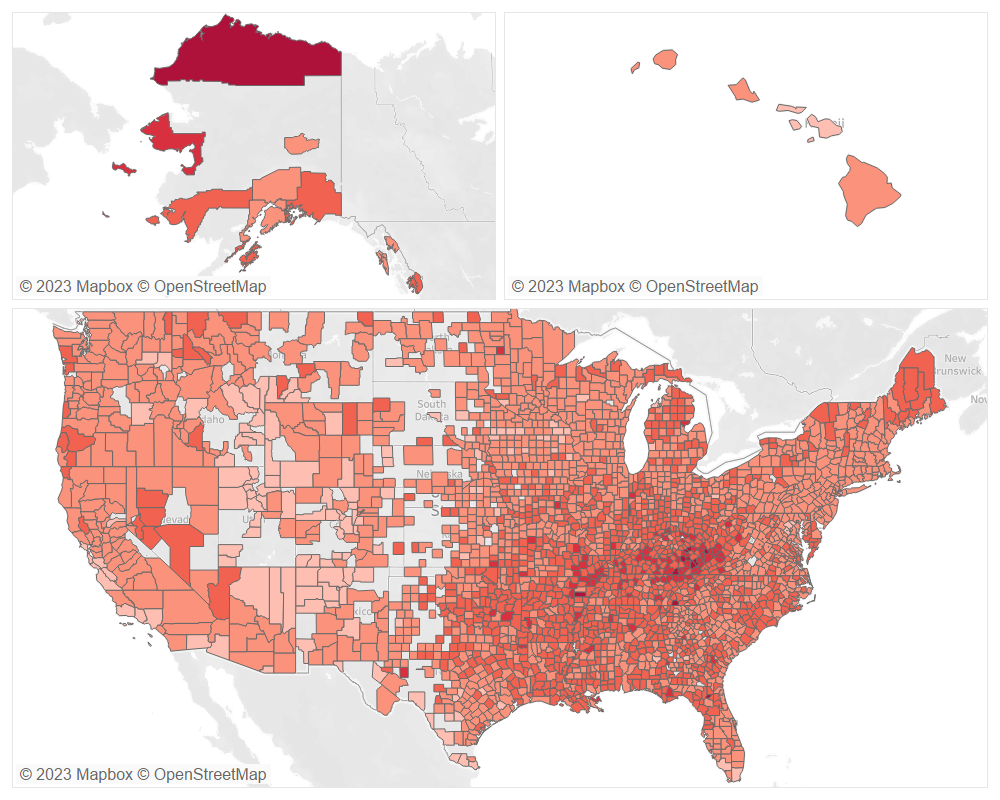

In [14]:
# step 1.5.2 - Code to remove all * rows in Mortality_Rate column
# asked OpenAIPlayground "how do I remove all rows in column "Mortality_Rate" with data include *?"
df15 = df14.loc[~df14['Mortality_Rate'].apply(lambda x: '*' in str(x))]

### 1.6 Reformat the rest of the columns specified in 1.3 to numerical [5 Marks]
In each column reformat all the cells that you can. 

*Hint*: You can keep the cells that you cannot reformat until you decide if you want to use the specific column in the model. This is because you want to lose as least data as possible. So you can drop the associated rows if you want to use the column and keep them if the specific column is not used.

In [15]:
df16 = df15
# step 1.6.1 - clean up inaccurate data in MN with extra ' #' at the end.
df16['Incidence_Rate'] = df16['Incidence_Rate'].str.replace(' #', '', regex=True)
df61 = df16

/var/folders/5q/hdnjx31x3pn37_b72bf6057r0000gn/T/ipykernel_3620/2171991307.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['Incidence_Rate'] = df16['Incidence_Rate'].str.replace(' #', '', regex=True)


In [16]:
# step 1.6.2 - removing all rows with '*','_','__'.
# asked OpenAIPlayground "how do I remove all rows with data include * or _ or __?"
df16 = df16[~df16.applymap(lambda x: '*' in str(x) or '_' in str(x) or '__' in str(x)).any(axis=1)]

In [17]:
# step 1.6.3 - converting all the entire Mortality_Rate and Incidence_Rate columns to float
df16['Mortality_Rate'] = df16['Mortality_Rate'].astype(float)
df16['Incidence_Rate'] = df16['Incidence_Rate'].astype(float)

/var/folders/5q/hdnjx31x3pn37_b72bf6057r0000gn/T/ipykernel_3620/2239080364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['Mortality_Rate'] = df16['Mortality_Rate'].astype(float)
/var/folders/5q/hdnjx31x3pn37_b72bf6057r0000gn/T/ipykernel_3620/2239080364.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16['Incidence_Rate'] = df16['Incidence_Rate'].astype(float)


In [18]:
# PLACEHOLDER - to replace all '*','_','__' to null_values
#df16['Avg_Ann_Incidence'] = df16['Avg_Ann_Incidence'].str.replace(r'\D+','')
#df16['Avg_Ann_Incidence'] = df16['Avg_Ann_Incidence'].replace('', np.nan)
#df16['Avg_Ann_Incidence'] = df16['Avg_Ann_Incidence'].astype(float)

### 1.7 Make the numerical data useful [5 Marks]
We know we have many columns of data, some of them are dependent on the populations. As a *Hint*, convert all the raw data to per 100,000 persons rates (divide by population and multiply by 100,000).

In [19]:
# step 1.7.1 - Normalize population related "Raw" data to relative rate over population
adj_raw_columns = ['All_Poverty'
               ,'M_Poverty'
               ,'F_Poverty'
               ,'M_With'
               ,'M_Without'
               ,'F_With'
               ,'F_Without'
               ,'All_With'
               ,'All_Without']

no_adj_raw_columns = ['Med_Income'
                  ,'Med_Income_White']

new_column_names = []

for adj_raw_columns in adj_raw_columns:
    new_column_name = 'Normalized_' + adj_raw_columns
    new_column_names.append(new_column_name)
    df16[new_column_name] = round(df16[adj_raw_columns].astype(float)/df16['POPESTIMATE2015']*100000,2)

/var/folders/5q/hdnjx31x3pn37_b72bf6057r0000gn/T/ipykernel_3620/1256877605.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16[new_column_name] = round(df16[adj_raw_columns].astype(float)/df16['POPESTIMATE2015']*100000,2)
/var/folders/5q/hdnjx31x3pn37_b72bf6057r0000gn/T/ipykernel_3620/1256877605.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df16[new_column_name] = round(df16[adj_raw_columns].astype(float)/df16['POPESTIMATE2015']*100000,2)
/var/folders/5q/hdnjx31x3pn37_b72bf6057r0000gn/T/ipykern

In [20]:
# step 1.7.2 - Final Clean up to select only the needed columns for further parts of this project
final_columns = ['State','AreaName']+new_column_names+no_adj_raw_columns+['Recent_Trend','Incidence_Rate','Mortality_Rate']
df17 = df16[final_columns]
df17.dtypes

State                      object
AreaName                   object
Normalized_All_Poverty    float64
Normalized_M_Poverty      float64
Normalized_F_Poverty      float64
Normalized_M_With         float64
Normalized_M_Without      float64
Normalized_F_With         float64
Normalized_F_Without      float64
Normalized_All_With       float64
Normalized_All_Without    float64
Med_Income                float64
Med_Income_White          float64
Recent_Trend               object
Incidence_Rate            float64
Mortality_Rate            float64
dtype: object

## **Part 2: Exploratory analysis [15 Marks]**

### 2.1 Visualizing different features [5 Marks]
Here, show different feature and how they change with respect to each other.
*Hint*: A good function to use here is `sns.pairplot`. Remember to have the plots labeled properly so that they are self explanatory.


https://seaborn.pydata.org/generated/seaborn.pairplot.html

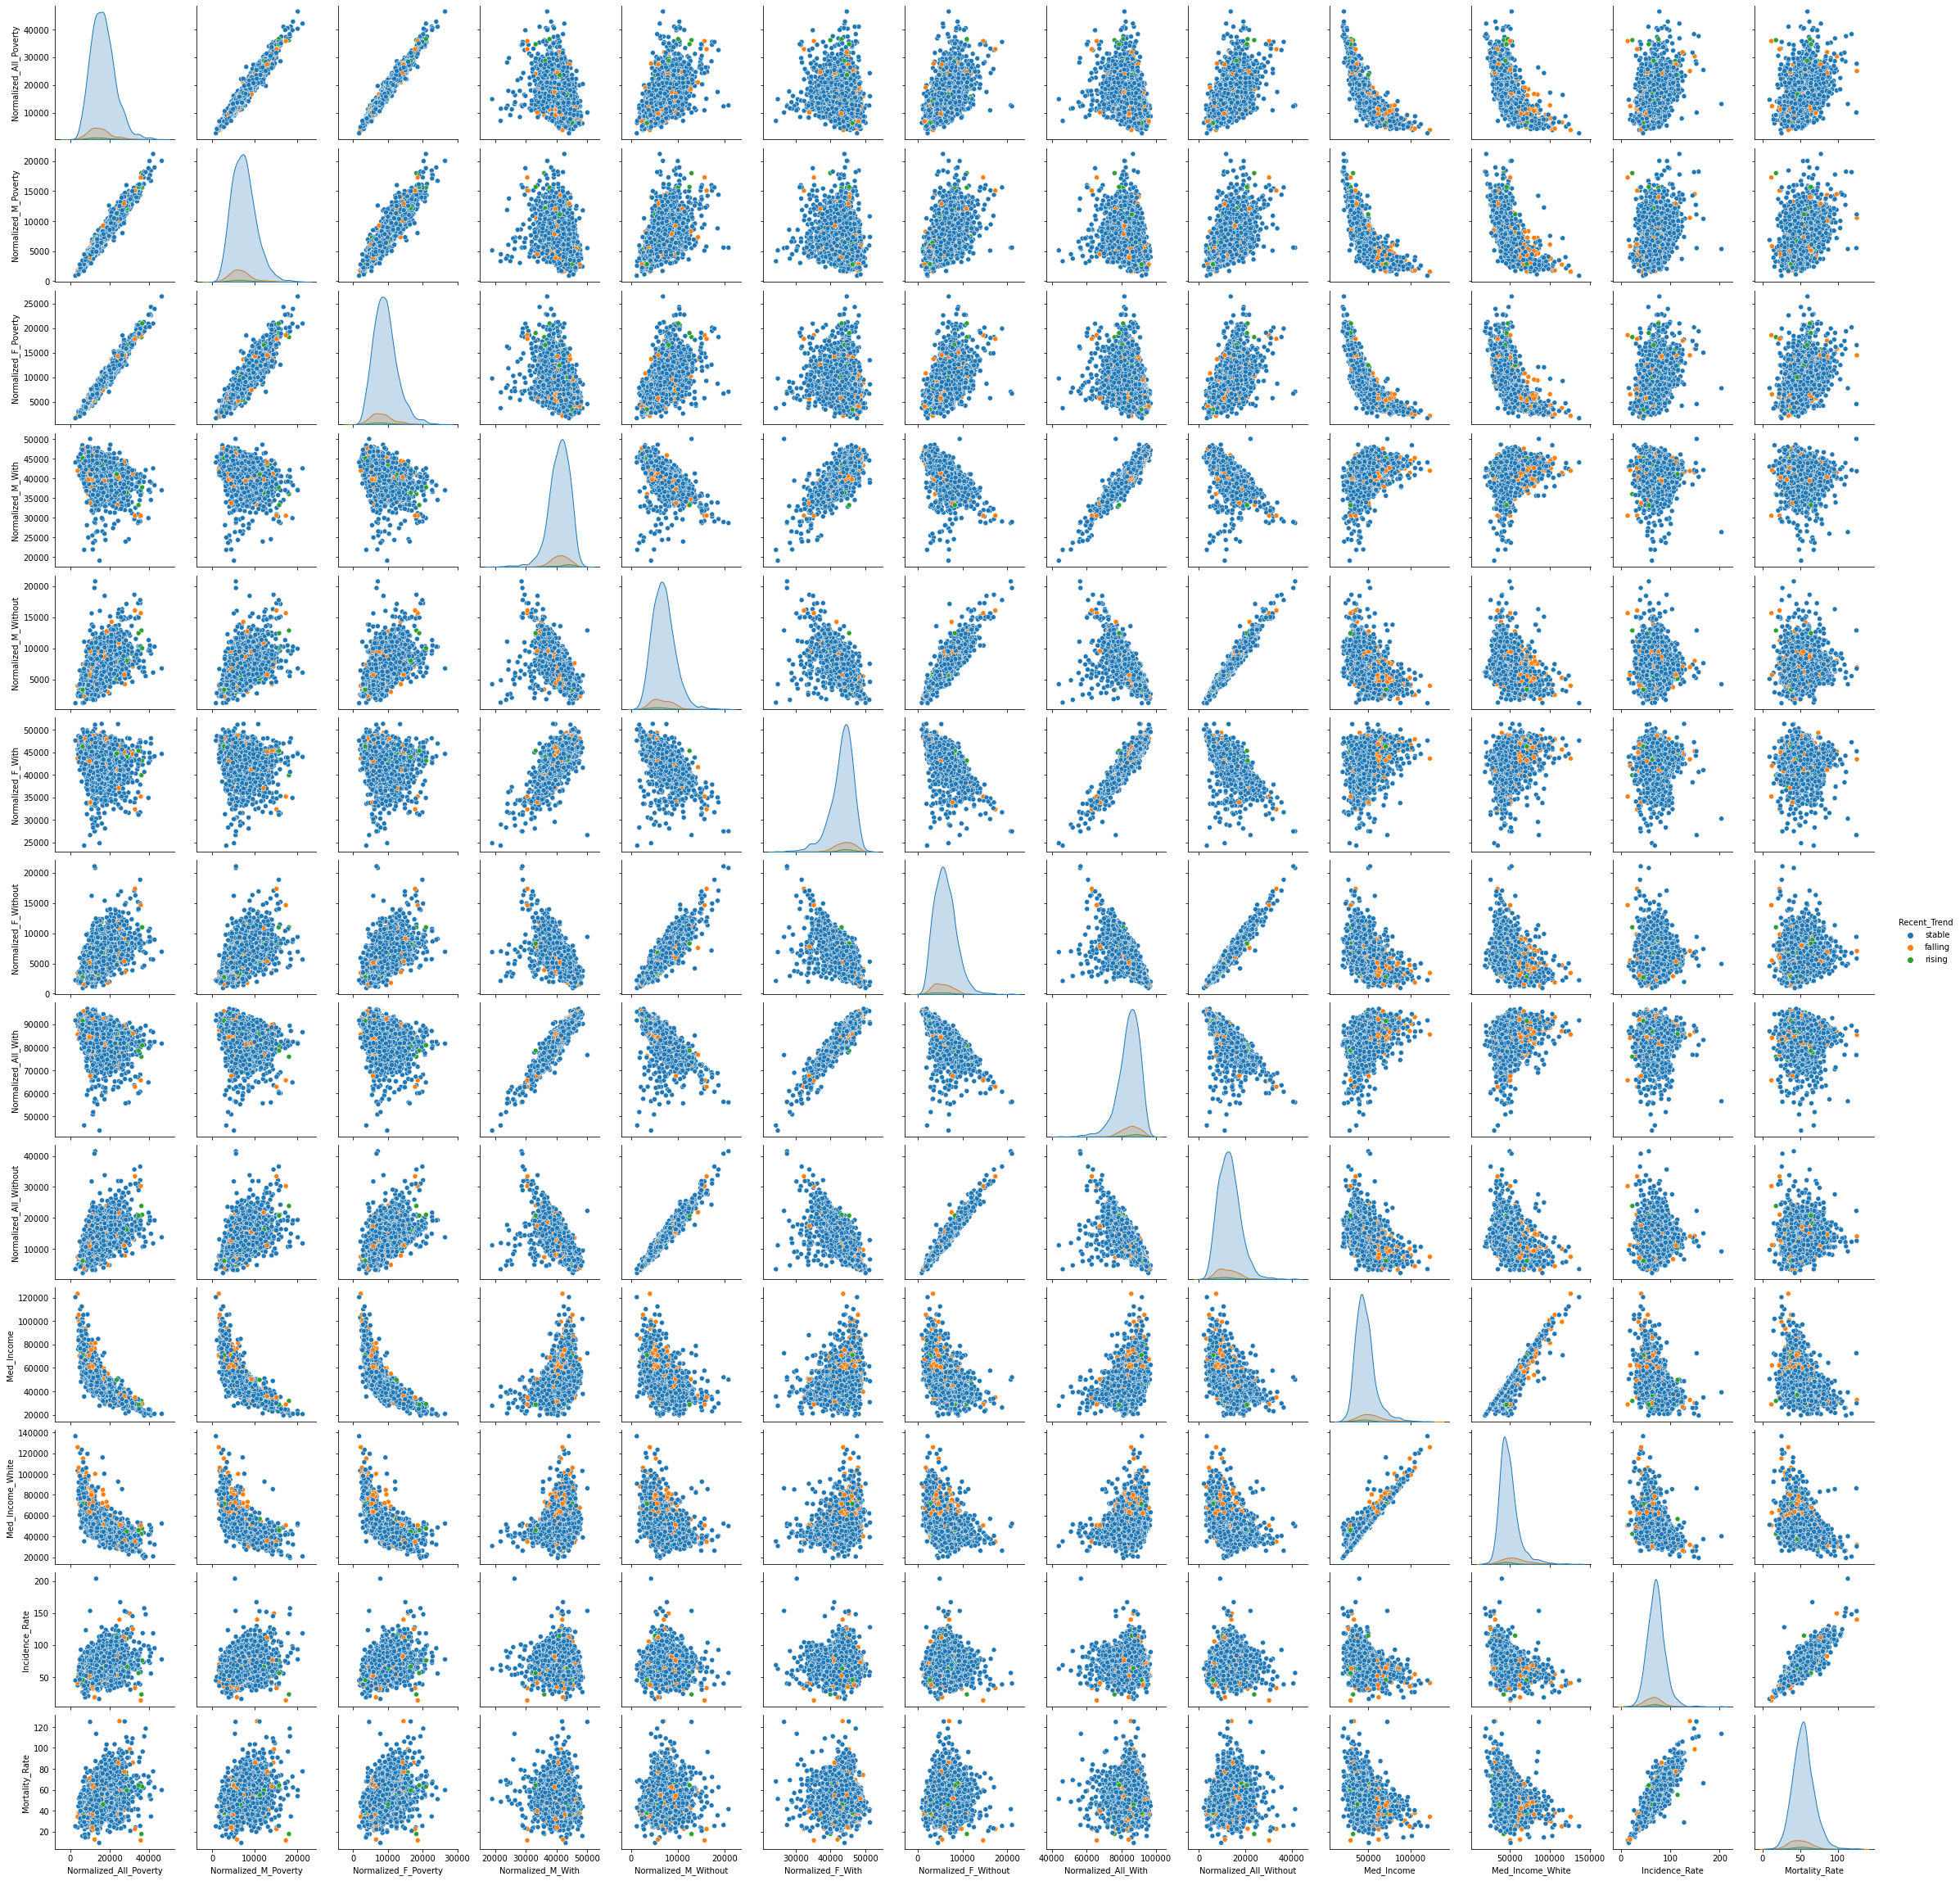

In [21]:
# step 2.1.1 - Plotting the graphs using the formatted and normalized columns from part 1
sns.pairplot(df17,hue="Recent_Trend")

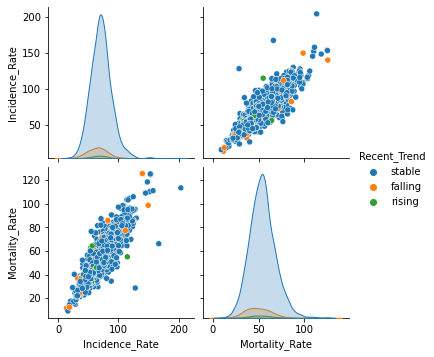

In [22]:
# step 2.1.2 - Using columns Incidence_Rate, Mortality_Rate to create a scatter plot adding hue = Recent_Trend to add semantic mapping.
sns.pairplot(df17.loc[:,['Incidence_Rate','Mortality_Rate','Recent_Trend']],hue="Recent_Trend")

### 2.2 Selecting the most important features [10 Marks]
In this step, we want to remove the redundant features. 

*Hint*: This can be done by analyzing the correlation between the features and removing the highly correlated features. Remember, throughout the project, write down specific reasons for any decision you make.

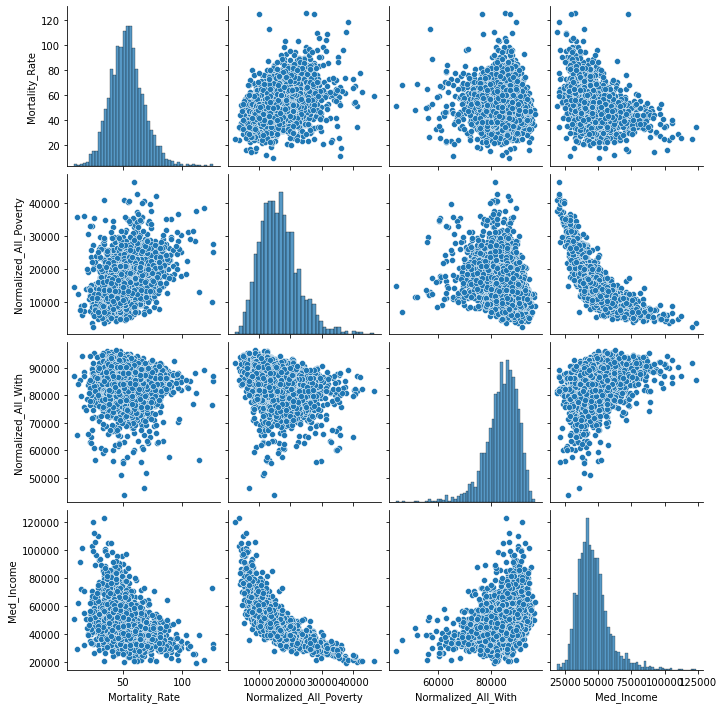

In [23]:
# step 2.2.1 - Removing redundant fields which do not display correlation from the #step 2.1.1 and then creating a scatter plot with the columns mentioned below
sns.pairplot(df17.loc[:,['Mortality_Rate','Normalized_All_Poverty','Normalized_All_With','Med_Income']])

## **Part 3: Regression Model Construction [30 Marks]**

### 3.1 Splitting the dataset [5 Marks] 

Split the dataset to three parts: train, validation, and test. You choose the ratios for the three datasets and provide a one-sentence rationale on why you went with such ratios.

*Hint*: You can use the validation set approach from ch5 lab (google colab).

In [24]:
# Step 3.1.1 - Shuffle the dataset and reset the index. We are going to do a 3-way split of the data to 50%, 25%, 25% 
# code leveraged from lab cross-validation for regression
df17_shuffle = df17.sample(frac=1,random_state=3).reset_index(drop=True)

df31_hold_out=df17_shuffle[int(0.75*len(df17)):len(df17)]
df31_available=df17_shuffle[0:int(0.75*len(df17))]

np.random.seed(1)
train = np.random.choice(df31_available.shape[0], int(2*df31_available.shape[0]/3), replace=False) #separating 50% to training set and 25% validation set 
print(len(train))
select = np.in1d(range(df31_available.shape[0]), train)
print(len(select))

1308
1963


### 3.2 Model training [15 Marks]
Create three different models, using different features (and optionally nonlinear transformations). The purpose of these models is to predict mortality rate of lung cancer with reasonably high R2 (at least exceeding 70%) using a carefully chosen and justified set of features. Use the visualizations from section 2.1 to inform the feature selection for each model.

**Reflection:** based on the pair plots, we expect to see some significant relation between mortality rate and incidence rate. Other interesting variables are the overall metrics for poverty, income and access to health insurance.
On the other hand, Lung cancer is closely related to the person's habits (like smoking and exercises) and enviromental conditions (like pollution and access to 'green' areas). None of these is directly available in the dataset but it might be represented in a geographical dummy (like state), since people from the same state tend to share cultural aspects and are subjected to similar structural conditions and policies
In this section we will fit different linear regression models considering the aforementioned variables: Indicidence rate, State, poverty, income and access to health insurance.

In [25]:
# step 3.2.1 Backward Selection

In [26]:
# 3.2.1 a) Using all variables
# code leveraged from lab cross-validation for regression
lm_model1a = smf.ols('Mortality_Rate ~ State+Incidence_Rate+AreaName+Normalized_All_Poverty+Normalized_M_Poverty+Normalized_F_Poverty+Normalized_M_With+Normalized_M_Without+Normalized_F_With+Normalized_F_Without+Normalized_All_With+Normalized_All_Without+Med_Income+Med_Income_White+Recent_Trend', data = df31_available[select]).fit()
lm_model1a.summary()
# R^2 = 1 --> overfit

/Users/yashika/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/yashika/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/yashika/opt/anaconda3/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 09 Feb 2023   Prob (F-statistic):                nan
Time:                        22:18:35   Log-Likelihood:                 26731.
No. Observations:                1308   AIC:                        -5.085e+04
Df Residuals:                       0   BIC:                        -4.408e+04
Df Model:                        1307                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                  8.3501        inf          0        nan         nan         nan
State[T.AL]                                                1.5380        inf          0        nan         nan         nan
State[T.AR]                                                4.4260        inf          0        nan         nan         nan
State[T.AZ]                                               -5.3060        inf         -0        nan         nan         nan
State[T.CA]                                               -3.1139        inf         -0        nan         nan         nan
State[T.CO]                                               -4.5489        inf         -0        nan         nan         nan
State[T.CT]                                               -3.5427        inf         -0        nan         nan         nan
State[T.DC]                                                0.8589        inf          0        nan         nan         nan
State[T.DE]                                               -0.0338        inf         -0        nan         nan         nan
State[T.FL]                                               -1.1917        inf         -0        nan         nan         nan
State[T.GA]                                               -1.2751        inf         -0        nan         nan         nan
State[T.HI]                                               -1.1987        inf         -0        nan         nan         nan
State[T.IA]                                               -3.9862        inf         -0        nan         nan         nan
State[T.ID]                                               -4.2692        inf         -0        nan         nan         nan
State[T.IL]                                               -2.8481        inf         -0        nan         nan         nan
State[T.IN]                                                2.0581        inf          0        nan         nan         nan
State[T.KY]                                                3.6452        inf          0        nan         nan         nan
State[T.LA]                                                5.0831        inf          0        nan         nan         nan
State[T.MA]                                               -0.6314        inf         -0        nan         nan         nan
State[T.MD]                                                3.2515        inf          0        nan         nan         nan
State[T.ME]                                               -1.8637        inf         -0        nan         nan         nan
State[T.MI]                                                1.7708        inf          0        nan         nan         nan
State[T.

In [27]:
# 3.2.1 b) removing variables one by one removing state
# code leveraged from lab cross-validation for regression
lm_model1b = smf.ols('Mortality_Rate ~ Incidence_Rate+Normalized_All_Poverty+Normalized_M_With+Normalized_All_With+Normalized_All_Without+Med_Income', data = df31_available[select]).fit()
lm_model1b.summary()
# After removing variables one by one we have the model where the R^2 is 0.765 which is the best from the backward selection method

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     704.3
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:18:36   Log-Likelihood:                -4408.1
No. Observations:                1308   AIC:                             8830.
Df Residuals:                    1301   BIC:                             8866.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.2111      5.016      0.640      0.522      -6.629      13.051
Incidence_Rate             0.6626      0.012     54.049      0.000       0.639       0.687
Normalized_All_Poverty  3.602e-05   5.77e-05      0.624      0.533   -7.72e-05       0.000
Normalized_M_With          0.0002      0.000      0.936      0.349      -0.000       0.001
Normalized_All_With    -2.475e-05      0.000     -0.230      0.818      -0.000       0.000
Normalized_All_Without     0.0003   7.18e-05      3.784      0.000       0.000       0.000
Med_Income                -0.0001   2.55e-05     -4.053      0.000      -0.000   -5.34e-05
==============================================================================
Omnibus:                      296.732   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3619.379
Skew:                          -0.688   Prob(JB):                         0.00
Kurtosis:                      11.032   Cond. No.                     2.75e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# step 3.2.2 Forward Selection

In [29]:
# 3.2.2 a) using the variable Incidence_Rate as the first variable
# code leveraged from lab cross-validation for regression
lm_model2a = smf.ols('Mortality_Rate ~ Incidence_Rate', data = df31_available[select]).fit()
lm_model2a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     3801.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:18:36   Log-Likelihood:                -4462.3
No. Observations:                1308   AIC:                             8929.
Df Residuals:                    1306   BIC:                             8939.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          4.7111      0.827      5.698      0.000       3.089       6.333
Incidence_Rate     0.6996      0.011     61.653      0.000       0.677       0.722
==============================================================================
Omnibus:                      262.424   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3788.285
Skew:                          -0.492   Prob(JB):                         0.00
Kurtosis:                      11.279   Cond. No.                         297.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
# 3.2.2 b) using the variable Incidence_Rate as the first variable and adding variables one by one to find a high R^2
# code leveraged from lab cross-validation for regression
lm_model2b = smf.ols('Mortality_Rate ~ Incidence_Rate+State+Normalized_All_Poverty+Med_Income+Normalized_All_Without', data = df31_available[select]).fit()
lm_model2b.summary()
# the highest value of R^2 is 0.798 with the variable mentioned above from forward selection

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     97.18
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:18:36   Log-Likelihood:                -4308.6
No. Observations:                1308   AIC:                             8721.
Df Residuals:                    1256   BIC:                             8990.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 23.9700      3.827      6.263      0.000      16.462      31.478
State[T.AL]               -5.0871      2.670     -1.905      0.057     -10.326       0.152
State[T.AR]               -1.8252      2.610     -0.699      0.484      -6.945       3.295
State[T.AZ]              -13.1329      3.602     -3.646      0.000     -20.199      -6.066
State[T.CA]              -10.0101      2.645     -3.784      0.000     -15.200      -4.821
State[T.CO]              -11.5472      2.823     -4.091      0.000     -17.085      -6.009
State[T.CT]              -10.7306      3.792     -2.830      0.005     -18.170      -3.291
State[T.DC]               -9.0569      7.095     -1.277      0.202     -22.976       4.863
State[T.DE]               -7.0494      7.075     -0.996      0.319     -20.930       6.831
State[T.FL]               -8.7167      2.588     -3.368      0.001     -13.795      -3.639
State[T.GA]               -7.8798      2.441     -3.228      0.001     -12.669      -3.091
State[T.HI]               -8.4596      7.070     -1.197      0.232     -22.330       5.411
State[T.IA]              -10.3772      2.638     -3.934      0.000     -15.553      -5.202
State[T.ID]              -10.9562      2.769     -3.957      0.000     -16.389      -5.524
State[T.IL]               -9.1609      2.602     -3.521      0.000     -14.265      -4.057
State[T.IN]               -3.9280      2.537     -1.549      0.122      -8.904       1.048
State[T.KY]               -2.3165      2.552     -0.908      0.364      -7.324       2.691
State[T.LA]               -5.7595      2.578     -2.234      0.026     -10.817      -0.703
State[T.MA]               -7.2323      3.641     -1.987      0.047     -14.375      -0.090
State[T.MD]               -3.3217      3.083     -1.077      0.282      -9.371       2.727
State[T.ME]               -8.7355      3.111     -2.808      0.005     -14.838      -2.633
State[T.MI]               -4.7182      2.593     -1.819      0.069      -9.806       0.369
State[T.MO]               -6.4700      2.503     -2.585      0.010     -11.380      -1.560
State[T.MS]               -4.7403      2.622     -1.808      0.071      -9.884       0.403
State[T.MT]              -14.1419      2.815     -5.023      0.000     -19.665      -8.619
State[T.NC]               -9.3517      2.538     -3.684      0.000     -14.331      -4.372
State[T.ND]               -8.8046      3.169     -2.778      0.006     -15.022      -2.588
State[T.NE]               -9.3618      2.782     -3.365      0.001     -14.820      -3.904
State[T.NH]               -8.0716      3.570     -2.261      0.024     -15.075      -1.068
State[T.NJ]               -9.7399      2.905     -3.353      0.001     -15.439      -4.041
State[T.NM]              -13.9858      3.108     -4.500      0.000     -20.083  

In [31]:
# step 3.2.3 : selecting variable based on trasformations and selecting random variables

In [32]:
# 3.2.3 a) - combining the all variables except state to check R^2
# code leveraged from lab cross-validation for regression
lm_model3a = smf.ols('Mortality_Rate~Normalized_All_Without+Med_Income+Incidence_Rate+Normalized_All_Poverty', data = df31_available[select]).fit()
lm_model3a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:18:36   Log-Likelihood:                -4409.5
No. Observations:                1308   AIC:                             8829.
Df Residuals:                    1303   BIC:                             8855.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.8811      2.222      3.996      0.000       4.521      13.241
Normalized_All_Without     0.0002   5.04e-05      4.319      0.000       0.000       0.000
Med_Income                -0.0001   2.53e-05     -4.108      0.000      -0.000   -5.43e-05
Incidence_Rate             0.6624      0.012     54.023      0.000       0.638       0.686
Normalized_All_Poverty   2.85e-05   5.42e-05      0.526      0.599   -7.79e-05       0.000
==============================================================================
Omnibus:                      300.661   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3697.388
Skew:                          -0.700   Prob(JB):                         0.00
Kurtosis:                      11.117   Cond. No.                     5.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
# 3.2.3 b) - combining other factors that could lead to higher mortality such as income can effect the access of healthcare 
# code leveraged from lab cross-validation for regression
lm_model3b = smf.ols('Mortality_Rate~Normalized_All_Without+Med_Income+Normalized_All_Poverty+State', data = df31_available[select]).fit()
lm_model3b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     31.24
Date:                Thu, 09 Feb 2023   Prob (F-statistic):          9.25e-184
Time:                        22:18:36   Log-Likelihood:                -4825.9
No. Observations:                1308   AIC:                             9754.
Df Residuals:                    1257   BIC:                         1.002e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 83.4803      5.208     16.030      0.000      73.264      93.697
State[T.AL]              -11.0942      3.957     -2.804      0.005     -18.858      -3.331
State[T.AR]               -2.2893      3.874     -0.591      0.555      -9.890       5.311
State[T.AZ]              -29.4005      5.311     -5.536      0.000     -39.819     -18.982
State[T.CA]              -23.5917      3.892     -6.061      0.000     -31.228     -15.956
State[T.CO]              -29.7159      4.132     -7.191      0.000     -37.823     -21.609
State[T.CT]              -14.4680      5.627     -2.571      0.010     -25.508      -3.428
State[T.DC]              -16.4396     10.528     -1.561      0.119     -37.095       4.216
State[T.DE]               -5.8039     10.502     -0.553      0.581     -26.408      14.800
State[T.FL]              -13.1085      3.839     -3.415      0.001     -20.639      -5.578
State[T.GA]              -10.3138      3.622     -2.847      0.004     -17.421      -3.207
State[T.HI]              -24.2042     10.478     -2.310      0.021     -44.760      -3.649
State[T.IA]              -20.7298      3.896     -5.321      0.000     -28.373     -13.086
State[T.ID]              -25.6528      4.072     -6.300      0.000     -33.642     -17.664
State[T.IL]              -10.2536      3.862     -2.655      0.008     -17.830      -2.677
State[T.IN]               -4.7448      3.765     -1.260      0.208     -12.132       2.642
State[T.KY]                9.7965      3.760      2.605      0.009       2.419      17.174
State[T.LA]               -9.2152      3.824     -2.410      0.016     -16.718      -1.713
State[T.MA]              -10.4633      5.403     -1.937      0.053     -21.063       0.137
State[T.MD]               -7.5377      4.574     -1.648      0.100     -16.511       1.436
State[T.ME]              -12.3452      4.616     -2.675      0.008     -21.400      -3.290
State[T.MI]              -13.7910      3.834     -3.597      0.000     -21.313      -6.269
State[T.MO]               -8.0926      3.714     -2.179      0.030     -15.380      -0.805
State[T.MS]               -9.7609      3.887     -2.511      0.012     -17.387      -2.135
State[T.MT]              -24.5181      4.160     -5.893      0.000     -32.680     -16.356
State[T.NC]              -13.4157      3.765     -3.563      0.000     -20.802      -6.030
State[T.ND]              -17.4881      4.692     -3.727      0.000     -26.694      -8.282
State[T.NE]              -21.2809      4.105     -5.184      0.000     -29.334     -13.228
State[T.NH]              -11.0440      5.298     -2.085      0.037     -21.438      -0.650
State[T.NJ]              -11.9905      4.312     -2.781      0.006     -20.449      -3.532
State[T.NM]              -34.3028      4.548     -7.543      0.000     -43.225  

In [34]:
# 3.2.3 c) - using sqaure transformations 
# code leveraged from lab cross-validation for regression
lm_model3bc = smf.ols('Mortality_Rate~Incidence_Rate+I(Incidence_Rate**2)+I(Incidence_Rate**3)+I(Incidence_Rate**4)', data = df31_available[select]).fit()
lm_model3bc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     979.3
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:18:36   Log-Likelihood:                -4446.4
No. Observations:                1308   AIC:                             8903.
Df Residuals:                    1303   BIC:                             8929.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -18.0307      8.888     -2.029      0.043     -35.466      -0.595
Incidence_Rate             1.9612      0.476      4.120      0.000       1.027       2.895
I(Incidence_Rate ** 2)    -0.0254      0.009     -2.799      0.005      -0.043      -0.008
I(Incidence_Rate ** 3)     0.0002   7.28e-05      3.023      0.003    7.73e-05       0.000
I(Incidence_Rate ** 4) -6.844e-07   2.06e-07     -3.326      0.001   -1.09e-06   -2.81e-07
==============================================================================
Omnibus:                      192.584   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2356.708
Skew:                          -0.196   Prob(JB):                         0.00
Kurtosis:                       9.564   Cond. No.                     2.77e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.77e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
lm_model_bw = smf.ols('Mortality_Rate~Normalized_All_Without+Med_Income+Incidence_Rate+Normalized_All_Poverty', data = df31_available[select]).fit()
lm_model_bw.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mortality_Rate   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     1055.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:18:37   Log-Likelihood:                -4409.5
No. Observations:                1308   AIC:                             8829.
Df Residuals:                    1303   BIC:                             8855.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  8.8811      2.222      3.996      0.000       4.521      13.241
Normalized_All_Without     0.0002   5.04e-05      4.319      0.000       0.000       0.000
Med_Income                -0.0001   2.53e-05     -4.108      0.000      -0.000   -5.43e-05
Incidence_Rate             0.6624      0.012     54.023      0.000       0.638       0.686
Normalized_All_Poverty   2.85e-05   5.42e-05      0.526      0.599   -7.79e-05       0.000
==============================================================================
Omnibus:                      300.661   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3697.388
Skew:                          -0.700   Prob(JB):                         0.00
Kurtosis:                      11.117   Cond. No.                     5.91e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 3.3 Model selection [10 Marks]
Using different model selection criteria and validation dataset, choose the single best perfoming model among the three models.

In [36]:
# step 3.3.1 - MSE for ~ Incidence_Rate+Normalized_All_Poverty+Normalized_M_With+Normalized_All_With+Normalized_All_Without+Med_Income(code leveraged from lab cross-validation for regression)
preds1 = lm_model1b.predict(df31_available)
square_error1 = (df31_available['Mortality_Rate'] - preds1)**2
print('--------Validation MSE for linear regression model--------')
print('MSE:',np.around(np.mean(square_error1[~select]),2))

--------Validation MSE for linear regression model--------
MSE: 40.27


In [37]:
# step 3.3.2 - MSE for ~ State+Normalized_All_Without+Med_Income+Incidence_Rate+Normalized_All_Poverty (code leveraged from lab cross-validation for regression)
preds2 = lm_model2b.predict(df31_available)
square_error2 = (df31_available['Mortality_Rate'] - preds2)**2
print('--------Validation MSE for linear regression model--------')
print('MSE:',np.around(square_error2[~select].mean(),2))

--------Validation MSE for linear regression model--------
MSE: 38.33


In [38]:
# step 3.3.3 - MSE for ~ Normalized_All_Without+Med_Income+Incidence_Rate+Normalized_All_Poverty (code leveraged from lab cross-validation for regression)
preds3 = lm_model3a.predict(df31_available)
square_error3 = (df31_available['Mortality_Rate'] - preds3)**2
print('--------Validation MSE for linear regression model--------')
MSE_validation = []
MSE_lm3 = np.around(square_error3[~select].mean(),2)
MSE_validation.append(MSE_lm3)
print('MSE:',MSE_lm3)

--------Validation MSE for linear regression model--------
MSE: 40.26


In [39]:
# step 3.3.4 - MSE for ~ Normalized_All_Without+Med_Income+Normalized_All_Poverty+State (code leveraged from lab cross-validation for regression)
preds4 = lm_model3b.predict(df31_available)
square_error4 = (df31_available['Mortality_Rate'] - preds4)**2
print('--------Validation MSE for linear regression model--------')
MSE_lm4 = np.around(square_error4[~select].mean(),2)
MSE_validation.append(MSE_lm4)
print('MSE:',MSE_lm4)

--------Validation MSE for linear regression model--------
MSE: 101.03


## **Part 4: Model diagnostics [10 marks]**
Explore model collinearity with `variance_inflation_factor`. Larger values of VIF indicate multicollinearity. Remove the problematic features and refit the model. Report how model R-squared is affected.

*Hint:* Consider VIF > 10 as an indicator of multicollinearity. If the VIF for all your features is below 10, it is a positive indication that the level of collinearity is acceptably low without any changes to the model needed in this step.

In [40]:
# step 4.1 - vif of model used in step 3.3.3 all factors but state (code leveraged from statology.org)
from patsy import dmatrices

y, X = dmatrices('Mortality_Rate ~ Incidence_Rate+State+Normalized_All_Poverty+Med_Income+Normalized_All_Without', data = df31_available[select], return_type='dataframe')
vif3 = pd.DataFrame()
vif3['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif3['variable'] = X.columns

np.around(vif3.sort_values('VIF', ascending = False),2)

VIF                variable
0   432.53               Intercept
40   10.52             State[T.TX]
16    9.87             State[T.KY]
42    9.16             State[T.VA]
10    8.67             State[T.GA]
22    7.84             State[T.MO]
39    7.23             State[T.TN]
21    6.74             State[T.MI]
14    6.64             State[T.IL]
12    6.39             State[T.IA]
25    6.32             State[T.NC]
15    6.31             State[T.IN]
32    5.90             State[T.OH]
45    5.61             State[T.WI]
23    5.58             State[T.MS]
2     5.53             State[T.AR]
35    5.28             State[T.PA]
17    5.11             State[T.LA]
1     4.87             State[T.AL]
9     4.72             State[T.FL]
33    4.68             State[T.OK]
46    4.63             State[T.WV]
31    4.63             State[T.NY]
4     4.33             State[T.CA]
37    4.16             State[T.SC]
27    3.95             State[T.NE]
49    3.94  Normalized_All_Poverty
50    3.75              Med_Income
34    3.48             State[T.OR]
13    3.41             State[T.ID]
44    3.41             State[T.WA]
5     3.19             State[T.CO]
24    3.18             State[T.MT]
51    2.89  Normalized_All_Without
29    2.64             State[T.NJ]
38    2.55             State[T.SD]
20    2.38             State[T.ME]
30    2.38             State[T.NM]
19    2.34             State[T.MD]
47    2.34             State[T.WY]
26    2.25             State[T.ND]
43    2.20             State[T.VT]
48    2.12          Incidence_Rate
18    1.79             State[T.MA]
3     1.75             State[T.AZ]
28    1.72             State[T.NH]
41    1.65             State[T.UT]
6     1.62             State[T.CT]
36    1.38             State[T.RI]
7     1.14             State[T.DC]
8     1.13             State[T.DE]
11    1.13             State[T.HI]

**Reflection:** we calculated the Variance Inflation Factor (VIF) for Model3, which estimates Mortality_Rate as a function of people without health insurance, % of poor people, median income and the incidence rate. We see all VIFs are way below 10, indicating the is no multicollinearity between them.

In [41]:
# step 4.2 - vif of model used in step 3.3.4, all factors but incidence rate (code leveraged from statology.org)
from patsy import dmatrices

y, X = dmatrices('Mortality_Rate~Normalized_All_Without+Med_Income+Normalized_All_Poverty+State', data = df31_available[select], return_type='dataframe')
vif4 = pd.DataFrame()
vif4['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif4['variable'] = X.columns

np.around(vif4.sort_values('VIF', ascending = False),2)

VIF                variable
0   363.44               Intercept
40   10.45             State[T.TX]
16    9.73             State[T.KY]
42    9.15             State[T.VA]
10    8.67             State[T.GA]
22    7.84             State[T.MO]
39    7.22             State[T.TN]
21    6.68             State[T.MI]
14    6.64             State[T.IL]
12    6.32             State[T.IA]
15    6.31             State[T.IN]
25    6.31             State[T.NC]
32    5.89             State[T.OH]
23    5.57             State[T.MS]
45    5.56             State[T.WI]
2     5.53             State[T.AR]
35    5.25             State[T.PA]
17    5.10             State[T.LA]
1     4.86             State[T.AL]
9     4.71             State[T.FL]
33    4.67             State[T.OK]
46    4.63             State[T.WV]
31    4.63             State[T.NY]
4     4.25             State[T.CA]
37    4.15             State[T.SC]
50    3.93  Normalized_All_Poverty
27    3.90             State[T.NE]
49    3.55              Med_Income
34    3.44             State[T.OR]
44    3.38             State[T.WA]
13    3.35             State[T.ID]
24    3.15             State[T.MT]
5     3.11             State[T.CO]
48    2.86  Normalized_All_Without
29    2.64             State[T.NJ]
38    2.52             State[T.SD]
20    2.38             State[T.ME]
19    2.34             State[T.MD]
30    2.31             State[T.NM]
47    2.30             State[T.WY]
26    2.24             State[T.ND]
43    2.20             State[T.VT]
18    1.79             State[T.MA]
3     1.73             State[T.AZ]
28    1.72             State[T.NH]
6     1.62             State[T.CT]
41    1.59             State[T.UT]
36    1.37             State[T.RI]
7     1.13             State[T.DC]
8     1.13             State[T.DE]
11    1.12             State[T.HI]

**Reflection:** we calculated the Variance Inflation Factor (VIF) for Model4, which estimates Mortality_Rate as a function of people without health insurance, % of poor people, median income and in which state is the county.
In this case, we see only one state (TX) has a VIF higher than 10, indicating that there may be at least one state with a similar behaviour than Texas. We decide not to change the model since this is not a significant impact and would cause a reduction in explanatory power of the model.
One way to reduce the VIF in the variables would be running a clustering algorithm, grouping states with similar metrics together and refit the model.

## **Part 5: Reporting test performance [5 marks]**
Report the MSE of the final regression model using the test set.

In [42]:
# step 5.1 - calculate MES to compare among top models and to compare against the variances
lm_models = [lm_model2b,lm_model3b]
MSE_Final = []
VAR_Final = []

for i in lm_models:
  preds = i.predict(df31_hold_out)
  square_error = (df31_hold_out['Mortality_Rate'] - preds)**2
  MSE = np.around(np.mean(square_error),2)
  MSE_Final.append(MSE)
  VAR = np.around(np.var(df17['Mortality_Rate']),2)
  VAR_Final.append(VAR)


In [43]:
# step 5.2 - summarize tble 
df = pd.DataFrame({'Model':['Best Model-lm_model2b','Comparable-lm_model3b'],'MSE_test':MSE_Final,'MSE_validation':MSE_validation,'VAR':VAR_Final})
df

Model  MSE_test  MSE_validation     VAR
0  Best Model-lm_model2b     38.49           40.26  199.02
1  Comparable-lm_model3b    102.36          101.03  199.02

**Observation**

From the table above, you can see that linear model 2b: 

  *(Mortality_Rate ~ Incidence_Rate+State+Normalized_All_Poverty+Med_Income+Normalized_All_Without)*

is the best performing model with the MSE of test data not too far off from that of the validation set. In the section below, we will explore other models that will get results that are similar or better than the model 2b.

## **Part 6: Alternative predictive model (optional): [20 bonus points up to the maximum mark]**

Use one other supervised learning model to outperform the regression model from part 5 (in terms of MSE) on the same hold-out test set. Document, justify, and explain all your decision w.r.t. the implementation of this alternative predictive model.

This part is deliberately designed without clear instructions as bonus points for efforts of groups in completing a very common ML task without a walkthrough or instrcutions.

# step 6.0 consideration of adding back null columns with more than 20% null

Source: https://datascience.stackexchange.com/questions/31434/handling-outliers-and-null-values-in-decision-tree

null values should be treated whether it is through replacement, transformation or deletion from your observations. This would depend on your dataset.

If the amount of null values is quite significant in your dataset, you should consider creating an additional feature stating whether the value is missing or absent. Some implementations handle that directly by creating a boolean, or replace the missing values by an "outlier" value. If the amount of null values is quite insignificant, and your dataset is large enough, you should consider deleting them, because it is the simpler and safer approach. Else, you might try to replace them by an imputed value, whether it is mean, median, modal, or another value that you may calculate from your features.

In this case, we decided not to add back any of the columns with missing data.

In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn import tree
import matplotlib.pyplot as plt

%matplotlib inline

## **Part 6.1: Alternative predictive model: Decision Tree**

In [45]:
# Step 6.1.1 - Data Clean Up - converting object type to float in previous DataFrame version df31_available
df61 = df31_available.drop(['State', 'AreaName','Recent_Trend'], axis=1)
df61_holdout = df31_hold_out.drop(['State', 'AreaName','Recent_Trend'], axis=1)
#df61.Recent_Trend = df61.Recent_Trend.map({'falling':-1, 'stable':1, 'rising':1}), it is giving NaN values :(?

In [46]:
# Step 6.1.2 - Parameter Setup
X = df61.drop(['Mortality_Rate'], axis=1)
y = df61.Mortality_Rate
X_holdout = df61_holdout.drop(['Mortality_Rate'], axis=1)
y_holdout = df61_holdout.Mortality_Rate
train_size = 0.5 # we used specific train size before, we can also use a percentage. 
random_state = 0
max_depth = 3

In [47]:
# Check - all variables has to be floats
X.dtypes

Normalized_All_Poverty    float64
Normalized_M_Poverty      float64
Normalized_F_Poverty      float64
Normalized_M_With         float64
Normalized_M_Without      float64
Normalized_F_With         float64
Normalized_F_Without      float64
Normalized_All_With       float64
Normalized_All_Without    float64
Med_Income                float64
Med_Income_White          float64
Incidence_Rate            float64
dtype: object

In [48]:
# Step 6.1.3 - Run Regression Trees Model
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=random_state)
regr_tree = DecisionTreeRegressor(max_depth=max_depth)
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

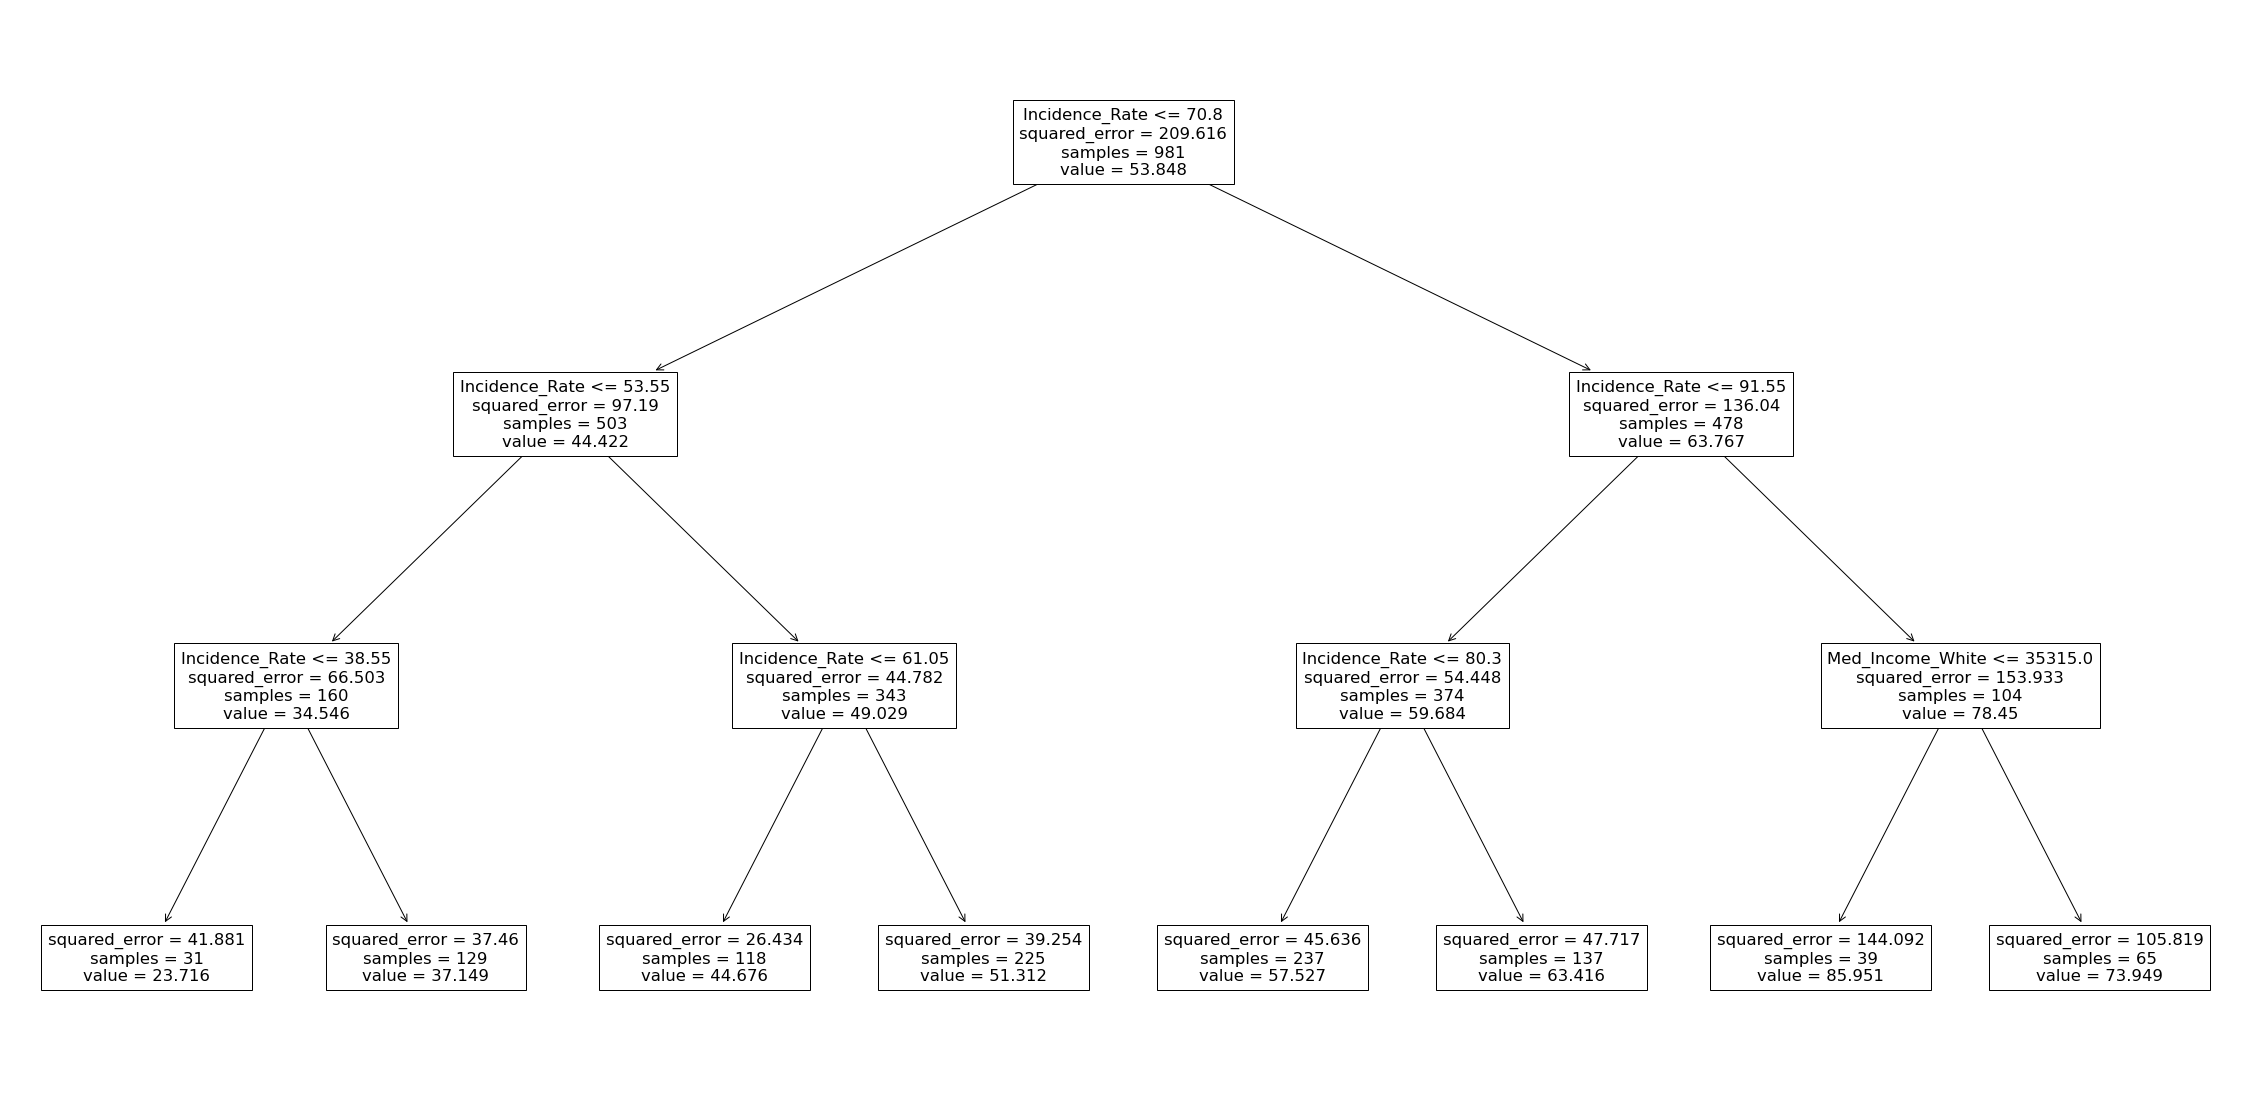

In [49]:
# Step 6.1.4 - Visualization by Plotting Regression Trees
plt.figure(figsize=(40,20))  # customize according to the size of your tree
plot_tree(regr_tree, feature_names = X_train.columns)
plt.show()

In [50]:
# Step 6.1.5 - Calculate Decision Tree Model Accuracy on Validation Data
y_pred = regr_tree.predict(X_val)
print(np.around(mean_squared_error(y_val, y_pred),2))

59.69


## **Part 6.2: Alternative predictive model: Bagging**

In [51]:
# # Step 6.2.1 - Run Bagging Model with the previous train and validation sets.
all_features = X_train.shape[1]
regr_bag = RandomForestRegressor(max_features=all_features, random_state=4)
regr_bag.fit(X_train, y_train)

RandomForestRegressor(max_features=12, random_state=4)

In [52]:
# Step 6.2.2 - Calculate Bagging Model Accuracy
y_pred = regr_bag.predict(X_val)
print(np.around(mean_squared_error(y_val, y_pred),2))

51.32


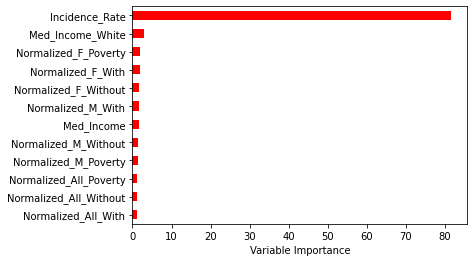

In [53]:
# Step 6.2.3 - Plot Variable Interpretation Graph to see the importance of each feature
Importance = pd.DataFrame({'Importance':regr_bag.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## **Part 6.3: Alternative predictive model: Random Forest**

In [54]:
# # Step 6.3.1 - Run Random Forest Model with the previous train and validation sets.
regr_rf = RandomForestRegressor(max_features=7, random_state=4)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(max_features=7, random_state=4)

In [55]:
# Step 6.3.2 - Calculate Random Forest Model Accuracy
y_pred = regr_rf.predict(X_val)
print(np.around(mean_squared_error(y_val, y_pred),2))

49.84


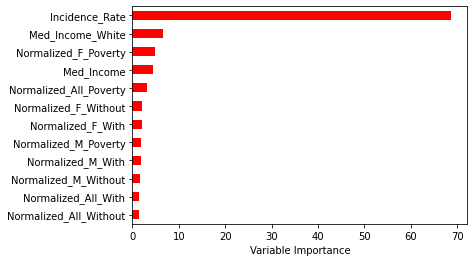

In [56]:
# Step 6.3.3 - Plot Variable Interpretation Graph to see the importance of each feature
Importance = pd.DataFrame({'Importance':regr_rf.feature_importances_*100}, index=X_train.columns)
Importance.sort_values(by='Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## **Part 6.4: Alternative predictive model: Boosting**

In [57]:
# # Step 6.4.1 - Run Boosting Model with the previous train and validation sets.
regr_boost = GradientBoostingRegressor(n_estimators=700, learning_rate=0.02, max_depth=3, random_state=1)
regr_boost.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.02, n_estimators=700, random_state=1)

In [58]:
# Step 6.4.2 - Calculate Boosting Model Accuracy
y_pred = regr_boost.predict(X_val)
print(np.around(mean_squared_error(y_val,y_pred),2))

49.92


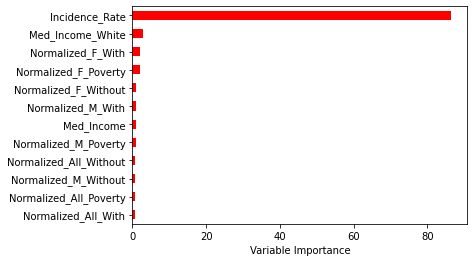

In [59]:
# Step 6.4.3 - Plot Variable Interpretation Graph to see the importance of each feature
rel_imp = pd.Series(regr_boost.feature_importances_*100, index=X_train.columns).sort_values()
rel_imp.plot(kind='barh', color='r')
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

## **Part 6.5: Comparing Different Predictive Models - MSE for Test (Holdout) Data**

In [60]:
# Step 6.5.1 - Reporting MSE and Variances for Tree Models
models = [regr_tree,regr_bag,regr_rf,regr_boost]

for i in models:
  preds = i.predict(X_holdout)
  square_error = (y_holdout - preds)**2
  MSE = np.around(np.mean(square_error),2)
  VAR = np.around(np.var(df17['Mortality_Rate']),2)
  MSE_Final.append(MSE)
  VAR_Final.append(VAR)


In [61]:
# Step 6.5.2 - Create MSE final comparison table for Decision Tree Model
df = pd.DataFrame({'Model':['lm_model2b','lm_model3b','regr_tree','regr_bag','regr_rf','regr_boost'],'MSE':MSE_Final, 'VAR':VAR_Final})
df

Model     MSE     VAR
0  lm_model2b   38.49  199.02
1  lm_model3b  102.36  199.02
2   regr_tree   57.48  199.02
3    regr_bag   48.14  199.02
4     regr_rf   50.40  199.02
5  regr_boost   47.70  199.02

**Conclusion**

All alternative models used a similar approach, using Incidence Rate as a key decision variable to come up with a prediction for the mortality rate. As one can expect, their performance is lower than a regression model that also uses incidence rate as a predictor (like model 2b) but better than models that don’t have incidence as a predictor.

On the other hand, saying that counties with higher incidence rates also have higher mortality rates is obvious (people get sick before dying from the disease) and does not provide meaningful insights for a policymaker for example. That is why we develop models without incidence rate as a predictor, like model 3b (with State, poverty, income, and access to health insurance) which, despite having lower performance than models with incidence rate, is able to provide more actionable insights for the user.
